In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy.stats as sstats
from sklearn.model_selection import train_test_split
from sklearn.cluster import Birch
from sklearn.metrics import confusion_matrix
from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)
from sklearn.naive_bayes import MultinomialNB
import tqdm

from KNN import KNN

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_batch_1 = unpickle('cifar10/data_batch_1')


db1_labels = np.array(data_batch_1[b'labels'])
db1_data = np.array(data_batch_1[b'data'])

trainx, testx, trainy, testy = train_test_split(db1_data, db1_labels, test_size=0.33)

In [5]:
def to_grayscale(x):
    new_x = x[:,:,0] * 0.3 + x[:, :, 1] * 0.59 + x[:, :, 2] * 0.11
    return new_x.astype(int)

train_x = trainx.reshape(-1, 32*32, 3)
test_x = testx.reshape(-1, 32*32, 3)
gray_train_x = to_grayscale(train_x)
gray_test_x = to_grayscale(test_x)

 20%|████████████████▊                                                                   | 1/5 [00:41<02:44, 41.19s/it]

KNN accuracy: 28.999999999999996 % on linear kernel


 40%|█████████████████████████████████▏                                                 | 2/5 [06:19<06:30, 130.18s/it]

KNN accuracy: 27.0 % on poly kernel


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [07:12<03:34, 107.18s/it]

KNN accuracy: 10.0 % on rbf kernel


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [07:56<01:28, 88.18s/it]

KNN accuracy: 10.0 % on sigmoid kernel


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [08:44<00:00, 104.91s/it]

KNN accuracy: 30.0 % on cosine kernel


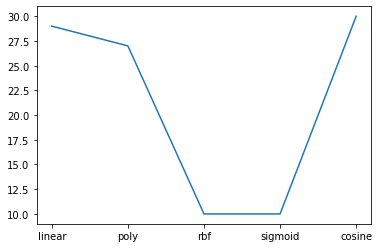

In [6]:
def kpca_kernels_comparison():
    kers = ['linear','poly','rbf', 'sigmoid', 'cosine']

    accs = []
    for ker in tqdm.tqdm(kers):
        kpca = decomposition.KernelPCA(n_components=None, kernel=ker, gamma=0.01)
        x_proj = kpca.fit_transform(trainx)
        x_test_proj = kpca.transform(testx)
        knn = KNN(x_proj, trainy, x_test_proj, [7])

        
        temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
        accs.append(temp_acc)
        print(f"KNN accuracy: {temp_acc} % on {ker} kernel")

    return kers, accs
    
kernels_after_gs, accuracies_after_gc = kpca_kernels_comparison()
plt.figure()
plt.plot(kernels_after_gs, accuracies_after_gc)

Po wyszarzaniu w zasadzie bez zmian. Delikatnie lepiej w przypadku kerneli liniowych i wielomianowych.

In [7]:
def kpca_3kernels_comparison():
    kers = ['linear','poly', 'cosine']
    gammas = [1, 0.1, 0.01, 0.0001]
    accs = []
    for ker in tqdm.tqdm(kers):
        for g in gammas:
            kpca = decomposition.KernelPCA(n_components=None, kernel=ker, gamma=g)
            x_proj = kpca.fit_transform(trainx)
            x_test_proj = kpca.transform(testx)
            knn = KNN(x_proj, trainy, x_test_proj, [7])


            temp_acc = np.round(np.count_nonzero(knn[7] == testy)/len(testy),2)*100
            accs.append(temp_acc)
            print(f"KNN accuracy: {temp_acc} % on {ker} kernel")

    return kers, accs
    
kernels_after_gs, accuracies_after_gc = kpca_3kernels_comparison()
# plt.figure()
# plt.plot(kernels_after_gs, accuracies_after_gc)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

KNN accuracy: 28.999999999999996 % on linear kernel
KNN accuracy: 28.999999999999996 % on linear kernel
KNN accuracy: 28.999999999999996 % on linear kernel


 33%|███████████████████████████▋                                                       | 1/3 [02:52<05:45, 172.51s/it]

KNN accuracy: 28.999999999999996 % on linear kernel
KNN accuracy: 27.0 % on poly kernel
KNN accuracy: 27.0 % on poly kernel
KNN accuracy: 27.0 % on poly kernel


 67%|███████████████████████████████████████████████████████▎                           | 2/3 [25:27<08:47, 527.38s/it]

KNN accuracy: 27.0 % on poly kernel
KNN accuracy: 30.0 % on cosine kernel
KNN accuracy: 30.0 % on cosine kernel
KNN accuracy: 30.0 % on cosine kernel


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [28:30<00:00, 570.20s/it]

KNN accuracy: 30.0 % on cosine kernel
